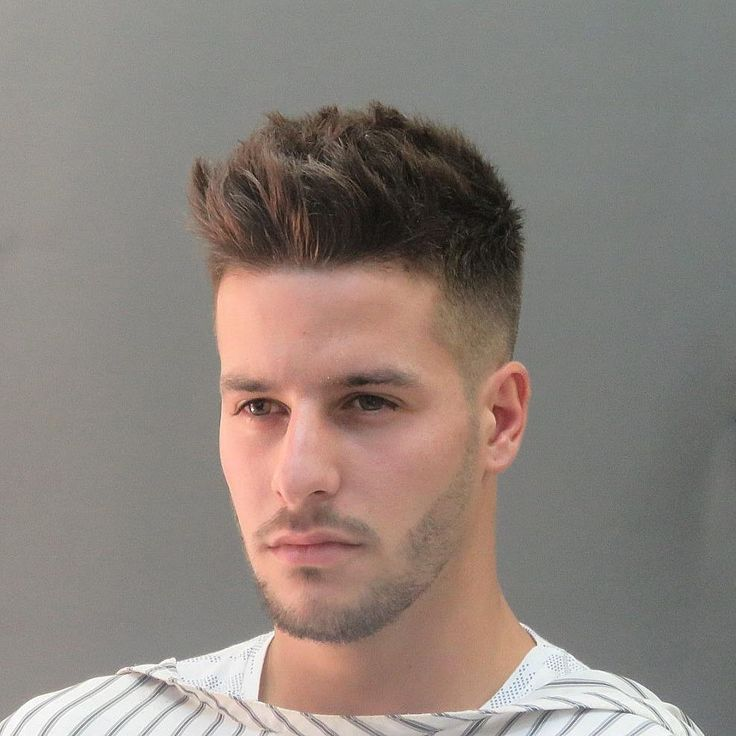

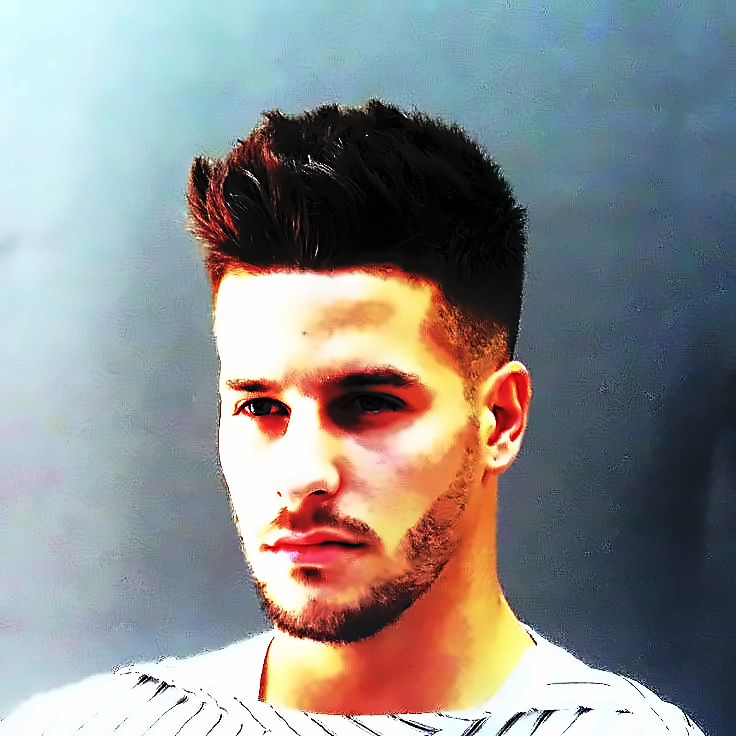

In [2]:
import cv2
from google.colab.patches import cv2_imshow
def enhance_image_quality(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Split the image into color channels
    b, g, r = cv2.split(image)

    # Apply histogram equalization to each color channel
    equalized_b = cv2.equalizeHist(b)
    equalized_g = cv2.equalizeHist(g)
    equalized_r = cv2.equalizeHist(r)

    # Merge the equalized color channels
    equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

    # Apply unsharp masking for sharpness enhancement
    blurred_image = cv2.GaussianBlur(equalized_image, (0, 0), 3)
    sharp_image = cv2.addWeighted(equalized_image, 1.5, blurred_image, -0.4, 0.4)

    # Apply denoising for noise reduction
    denoised_image = cv2.fastNlMeansDenoisingColored(sharp_image, None, 10, 10, 7, 21)

    return denoised_image


input_image_path = '/content/image.jpeg'

# Enhance image quality
enhanced_image = enhance_image_quality(input_image_path)

# Display the original and enhanced images
cv2_imshow( cv2.imread(input_image_path))
cv2_imshow( enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()